In [1]:
import seaborn
import numpy as np
import pandas as pd
import ranking as r
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

[INFO] This trial license of GraphLab Create is assigned to lax.cary@gmail.com and will expire on October 09, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-2791 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1442355746.log
[INFO] GraphLab Server Version: 1.5.2


PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 219487 observations with 29260 users and 64 items.
PROGRESS:     Data prepared in: 0.106302s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations            

In [72]:
athlete_ratings, segment_ratings, models = cm.df_to_latent_features(training_df)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 219487 observations with 29260 users and 64 items.
PROGRESS:     Data prepared in: 0.10076s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations             

In [2]:
vm.testing_rmse(models, training_df)

{'downhill': 0.82964593302008438,
 'total': 0.37819679349118379,
 'uphill': 0.23487788456187011}

In [27]:
lb = r.Leaderboards(df.groupby('athlete_id').mean().average_speed)
lb.store(athlete_ratings)

In [6]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

,total_rating,uphill_rating,downhill_rating
seg_average_grade,0.787374,-0.163594,0.423727
seg_distance,0.187823,-0.044032,0.280834
seg_maximum_grade,0.187392,0.002063,0.123295
total_rating,1.000000,-0.634669,0.522620
uphill_rating,-0.634669,1.000000,NaN
downhill_rating,0.522620,NaN,1.000000


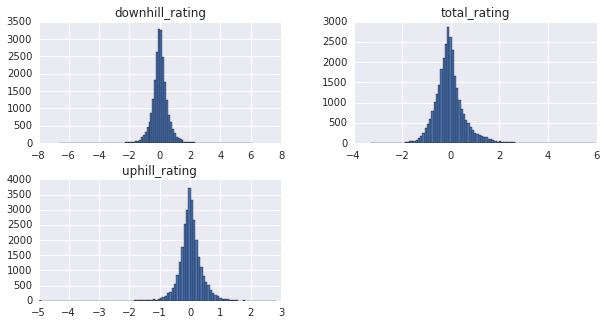

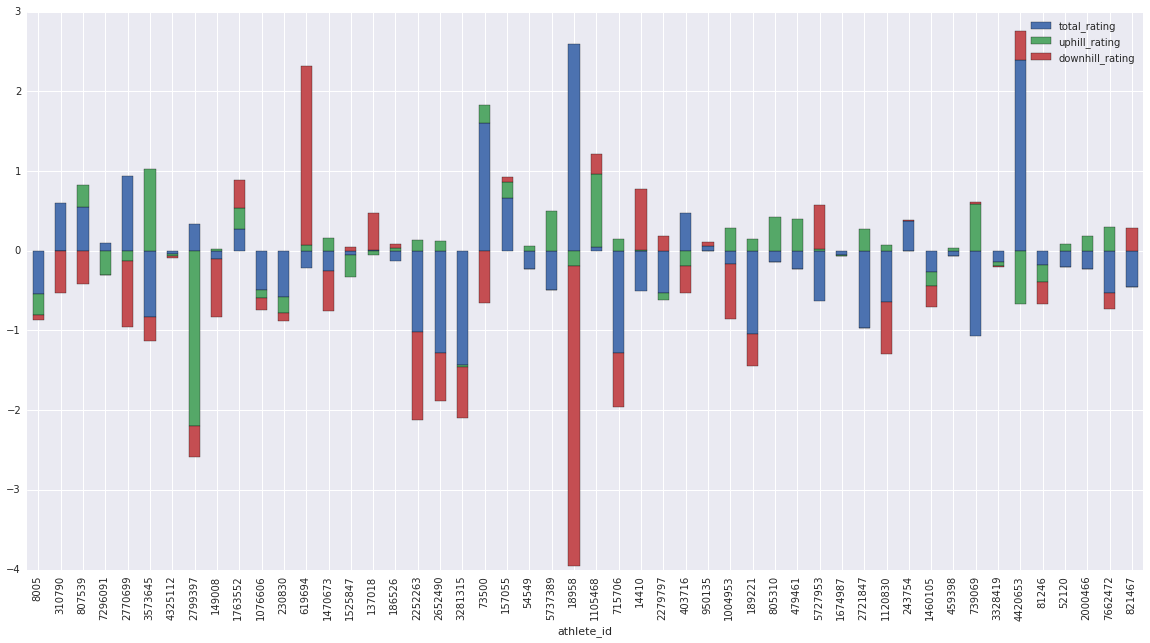

In [38]:
vm.plot_ratings(athlete_ratings)

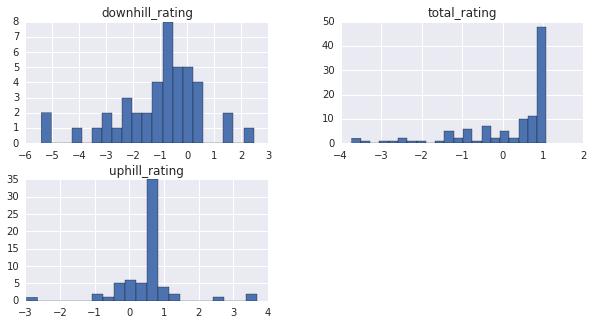

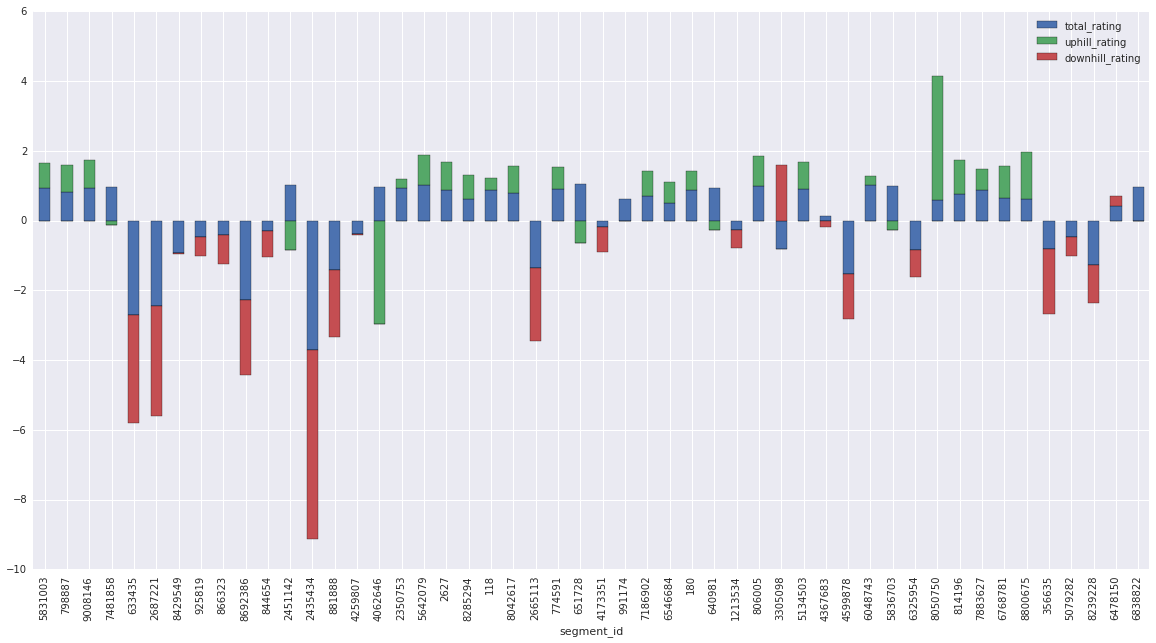

In [39]:
vm.plot_ratings(segment_ratings)

In [44]:
athletes = athlete_ratings[pd.notnull(athlete_ratings['downhill_rating'])].index

In [70]:
scaled_ratings_column = athlete_ratings.ix[athletes]['downhill_rating']
scaled_ratings_column += abs(scaled_ratings_column.min()) * 1
scaled_ratings_column *= 100. / scaled_ratings_column.max()
print scaled_ratings_column
athlete_ratings['downhill_rating'] = scaled_ratings_column

athlete_id
7           46.170257
8           40.476601
12          47.938456
17          42.185520
19          42.491264
21          41.018327
28          40.601560
30          41.509444
31          49.822438
35          48.645687
36          41.350446
38          44.167990
43          45.332279
45          39.020966
49          45.121271
51          49.618802
55          43.081012
57          42.012987
71          41.112653
73          45.880542
81          44.999125
83          47.407965
87          39.770708
91          41.923743
125         40.035241
129         43.413660
147         49.992065
163         49.756826
257         45.017611
287         52.856279
              ...    
10423538    44.380453
10423569    42.510620
10425041    39.760889
10435647    44.361025
10435857    44.482629
10440453    44.507812
10442445    46.236304
10449231    62.590165
10449828    43.296528
10457653    44.596677
10458353    45.110890
10458531    44.779542
10472665    41.183073
10482844    45.916610

In [71]:
athlete_ratings

,total_rating,uphill_rating,downhill_rating
athlete_id,,,
7,0.033963,0.338665,46.170257
8,0.503840,0.190317,40.476601
12,0.141446,0.015541,47.938456
17,0.518502,-0.007536,42.185520
19,-0.033432,0.151029,42.491264
21,0.205623,0.046547,41.018327
28,0.078425,0.148043,40.601560
30,0.305284,-0.007810,41.509444
31,0.059035,0.178749,49.822438
